**Pengumpulan dan Persiapan Data Awal**

## Download Dataset
1. Download seluruh dataset yang berada di link    
https://kaggle.com/datasets/23da82e7d33931801961c7e0ca8db42ad476adbb17eb15c604da942724ff8be4
2. Masukkan folder yang di download sesuai tahunnya
(semisal 2024 berarti dimasukkan disini, 2023 dan 2022 buat folder baru lalu masukkan disana)

Mengapa untuk mengekstrak teks dari pdf 
menggunakan cara pdf -> image -> teks?
1. Karena jika dari native pdf ke text   
text yang didapat berpotensi tidak mengambil keseluruhan informasi   
seperti contoh 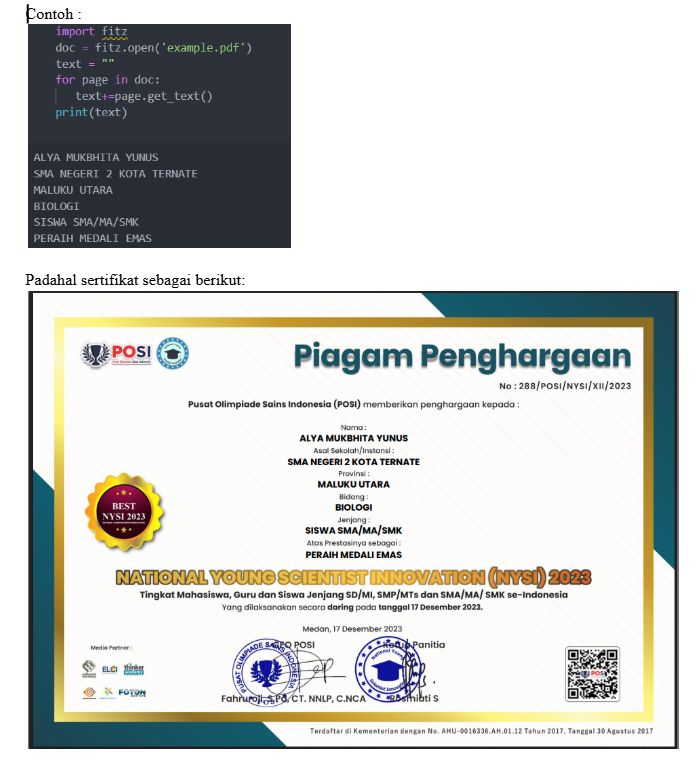
2. Terdapat beberapa file yang mencantumkan lebih dari 1 sertifikat 
3. Agar tiap image dapat dilihat dan dibersihkan dengan mudah 

In [ ]:
# Hilangkan tanda pagar (#) pada baris berikut untuk menginstall library yang diperlukan
# %pip install pymupdf
# %pip install fitz

In [ ]:
import fitz
import os
from pathlib import Path

pdf_folder = "2024/2024" #ubah sesuai dengan nama folder, semisal mau memproses folder 2022 atau 2023
all_results = []
pdf_files = [f for f in os.listdir(pdf_folder) if f.lower().endswith('.pdf')] #akan mencari semua file pdf di dalam folder

for pdf_file in pdf_files:
  print(f"Processing {pdf_file}...")
  pdf_path = os.path.join(pdf_folder, pdf_file)

  doc = fitz.open(pdf_path)
  zoom = 4
  mat = fitz.Matrix(zoom, zoom)
  base_filename = Path(pdf_path).stem
  
  for page_num in range(len(doc)):
    image_filename = f"{base_filename}-{page_num + 1}.jpg" 
    output_path = os.path.join("2024-img", image_filename) 
                  #ubah 2024-img menjadi 2023-img atau 2022-img untuk membuat folder lain sesuai dengan tahun sertif
    
    page = doc.load_page(page_num)
    try:
      pix = page.get_pixmap(matrix=mat)
      pix.save(output_path)
    except Exception as e:
      print(f"Error performing OCR on {base_filename}-{page_num + 1}: {str(e)}")
      
  doc.close()


Processing 424000147-1.pdf...
Processing 424000147-2.pdf...
Processing 424000147-3.pdf...
Processing 424000369-1.pdf...
Processing 424000734-1.pdf...
Processing 424000734-2.pdf...
Processing 424000734-3.pdf...
Processing 424000956-1.pdf...
Processing 424001098-1.pdf...
Processing 424001135-1.pdf...
Processing 424001135-2.pdf...
Processing 424001807-1.pdf...
Processing 424001807-2.pdf...
Processing 424001807-3.pdf...
Processing 424002005-1.pdf...
Processing 424002005-2.pdf...
Processing 424002079-1.pdf...
Processing 424002079-2.pdf...
Processing 424002079-3.pdf...
Processing 424002155-1.pdf...
Processing 424002876-1.pdf...
Processing 424002876-2.pdf...
Processing 424002876-3.pdf...
Processing 424002880-1.pdf...
Processing 424002880-2.pdf...
Processing 424003197-1.pdf...
Processing 424003197-2.pdf...
Processing 424003415-1.pdf...
Error performing OCR on 424003415-1-1: code=7: object is not a stream
Processing 424003415-2.pdf...
Error performing OCR on 424003415-2-1: code=7: object is not

## Pembersihan folder gambar secara manual
1. setelah pada folder baru (2024-img) dihasilkan, buatlah folder baru lagi dengan nama (2024-img-cleaned) dan copy seluruh gambar pada folder 2024-img ke 2024-img-cleaned untuk menyimpan hasil pembersihan gambar  
2. lakukan pembersihan folder gambar secara manual dengan cara menghapus gambar yang tidak relevan, rotasi gambar yang terbalik (deskewing), dan cropping daerah margin   


## Menyimpan seluruh nama file yang telah diproses ke dalam file csv untuk mempermudah labeling

In [ ]:
import os
import csv

def folder_to_csv(folder_path, output_csv):
  files = os.listdir(folder_path)
  
  with open(output_csv, mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['File Name'])
    
    for file_name in files:
      file_path = os.path.join(folder_path, file_name)
      
      if os.path.isfile(file_path):
        name_without_ext = os.path.splitext(file_name)[0] 
        writer.writerow([name_without_ext])
            
folder_to_csv('2024-img-cleaned', 'filename.csv')

## Mengekstrak teks dari tiap gambar menggunakan library easyocr

In [ ]:
# Hilangkan tanda pagar (#) pada baris berikut untuk menginstall library yang diperlukan
# %pip install easyocr

In [8]:
import os
import pandas as pd
import easyocr
from pathlib import Path

reader = easyocr.Reader(['id', 'en'])
cleaned_image_folder = "2024-img-cleaned"
image_files = [f for f in os.listdir(cleaned_image_folder)]
output_file = 'ocr_results.csv'

if not os.path.exists(output_file):
    df = pd.DataFrame(columns=['id', 'fulltext'])
    df.to_csv(output_file, index=False)

for image_file in image_files:
    try:
        image_path = os.path.join(cleaned_image_folder, image_file)
        print(f"Processing {image_file}...")
        text = reader.readtext(image_path, detail=0)
        result = {'id': Path(image_path).stem, 'fulltext': ' '.join(text)}

        df = pd.DataFrame([result])
        df.to_csv(output_file, mode='a', header=False, index=False)
        print(f"Saved {image_file} to {output_file}")
    except Exception as e:
        print(f"Error performing OCR on {image_path}: {str(e)}")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing 424000147-1-1.png...
Saved 424000147-1-1.png to ocr_results.csv
Processing 424000147-2-1.png...
Saved 424000147-2-1.png to ocr_results.csv
Processing 424000147-3-1.png...
Saved 424000147-3-1.png to ocr_results.csv
Processing 424000369-1-1.png...
Saved 424000369-1-1.png to ocr_results.csv
Processing 424000734-1-1.png...
Error performing OCR on 2024-img-cleaned\424000734-1-1.png: Image size (399498240 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Processing 424000956-1-1.png...
Saved 424000956-1-1.png to ocr_results.csv
Processing 424001098-1-1.png...
Saved 424001098-1-1.png to ocr_results.csv
Processing 424001098-1-2.png...
Saved 424001098-1-2.png to ocr_results.csv
Processing 424001135-1-1.png...
Saved 424001135-1-1.png to ocr_results.csv
Processing 424001135-2-1.png...
Saved 424001135-2-1.png to ocr_results.csv
Processing 424001807-1-1.png...
Saved 424001807-1-1.png to ocr_results.csv
Processing 424001807-2-1.png...
Saved 424001807-2-1.p

d:\kerja-praktek\certificate-classification\.venv\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (171388544 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Saved 424007889-1-1.png to ocr_results.csv
Processing 424007889-2-1.png...
Error performing OCR on 2024-img-cleaned\424007889-2-1.png: Image size (180230400 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Processing 424007889-3-1.png...


d:\kerja-praktek\certificate-classification\.venv\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (155695280 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Saved 424007889-3-1.png to ocr_results.csv
Processing 424007952-2-1.png...
Saved 424007952-2-1.png to ocr_results.csv
Processing 424008312-1-1.png...
Saved 424008312-1-1.png to ocr_results.csv
Processing 424008312-2-1.png...
Saved 424008312-2-1.png to ocr_results.csv
Processing 424008312-3-1.png...
Saved 424008312-3-1.png to ocr_results.csv
Processing 424008885-1-1.png...
Saved 424008885-1-1.png to ocr_results.csv
Processing 424008885-3-1.png...
Saved 424008885-3-1.png to ocr_results.csv
Processing 424009164-1-1.png...
Saved 424009164-1-1.png to ocr_results.csv
Processing 424009164-3-1.png...
Saved 424009164-3-1.png to ocr_results.csv
Processing 424009203-1-1.png...
Saved 424009203-1-1.png to ocr_results.csv
Processing 424009203-2-1.png...
Saved 424009203-2-1.png to ocr_results.csv
Processing 424009203-3-1.png...
Saved 424009203-3-1.png to ocr_results.csv
Processing 424009460-1-1.png...
Saved 424009460-1-1.png to ocr_results.csv
Processing 424009460-2-1.png...
Saved 424009460-2-1.png t

d:\kerja-praktek\certificate-classification\.venv\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (111456000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Saved 424013784-1-1.png to ocr_results.csv
Processing 424013784-2-1.png...
Saved 424013784-2-1.png to ocr_results.csv
Processing 424014163-1-1.png...
Saved 424014163-1-1.png to ocr_results.csv
Processing 424014163-2-1.png...
Saved 424014163-2-1.png to ocr_results.csv
Processing 424014163-3-1.png...
Saved 424014163-3-1.png to ocr_results.csv
Processing 424014296-1-1.png...


d:\kerja-praktek\certificate-classification\.venv\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (128494080 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Saved 424014296-1-1.png to ocr_results.csv
Processing 424014296-2-1.png...
Saved 424014296-2-1.png to ocr_results.csv
Processing 424014434-1-1.png...
Saved 424014434-1-1.png to ocr_results.csv
Processing 424014574-1-1.png...
Saved 424014574-1-1.png to ocr_results.csv
Processing 424014574-2-1.png...
Saved 424014574-2-1.png to ocr_results.csv
Processing 424014574-3-1.png...
Saved 424014574-3-1.png to ocr_results.csv
Processing 424014590-1-1.png...
Saved 424014590-1-1.png to ocr_results.csv
Processing 424015240-1-1.png...
Saved 424015240-1-1.png to ocr_results.csv
Processing 424015240-2-1.png...
Saved 424015240-2-1.png to ocr_results.csv
Processing 424015240-3-1.png...
Saved 424015240-3-1.png to ocr_results.csv
Processing 424015340-2-1.png...
Saved 424015340-2-1.png to ocr_results.csv
Processing 424015340-3-1.png...
Saved 424015340-3-1.png to ocr_results.csv
Processing 424015724-1-1.png...
Saved 424015724-1-1.png to ocr_results.csv
Processing 424015724-2-1.png...
Saved 424015724-2-1.png t

d:\kerja-praktek\certificate-classification\.venv\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (115763200 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Saved 424020521-1-1.png to ocr_results.csv
Processing 424020521-2-1.png...
Saved 424020521-2-1.png to ocr_results.csv
Processing 424020521-3-1.png...
Saved 424020521-3-1.png to ocr_results.csv
Processing 424020590-1-1.png...
Saved 424020590-1-1.png to ocr_results.csv
Processing 424020590-2-1.png...
Saved 424020590-2-1.png to ocr_results.csv
Processing 424020814-1-1.png...
Saved 424020814-1-1.png to ocr_results.csv
Processing 424020814-2-1.png...
Saved 424020814-2-1.png to ocr_results.csv
Processing 424020814-3-1.png...
Saved 424020814-3-1.png to ocr_results.csv
Processing 424020854-1-1.png...
Saved 424020854-1-1.png to ocr_results.csv
Processing 424020854-2-1.png...
Saved 424020854-2-1.png to ocr_results.csv
Processing 424020854-3-1.png...
Saved 424020854-3-1.png to ocr_results.csv
Processing 424021036-1-1.png...
Saved 424021036-1-1.png to ocr_results.csv
Processing 424021064-3-1.png...
Saved 424021064-3-1.png to ocr_results.csv
Processing 424021164-1-1.png...
Saved 424021164-1-1.png t

d:\kerja-praktek\certificate-classification\.venv\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (115763200 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Saved 424032080-1-1.png to ocr_results.csv
Processing 424032347-1-1.png...
Saved 424032347-1-1.png to ocr_results.csv
Processing 424032497-1-1.png...
Saved 424032497-1-1.png to ocr_results.csv
Processing 424032633-2-1.png...
Saved 424032633-2-1.png to ocr_results.csv
Processing 424032825-1-1.png...
Saved 424032825-1-1.png to ocr_results.csv
Processing 424032825-2-1.png...
Saved 424032825-2-1.png to ocr_results.csv
Processing 424032825-3-1.png...
Saved 424032825-3-1.png to ocr_results.csv
Processing 424032876-1-1.png...
Saved 424032876-1-1.png to ocr_results.csv
Processing 424033175-1-1.png...
Saved 424033175-1-1.png to ocr_results.csv
Processing 424033175-2-1.png...
Saved 424033175-2-1.png to ocr_results.csv
Processing 424033246-1-1.png...
Saved 424033246-1-1.png to ocr_results.csv
Processing 424033353-1-1.png...
Saved 424033353-1-1.png to ocr_results.csv
Processing 424033353-2-1.png...
Saved 424033353-2-1.png to ocr_results.csv
Processing 424034237-1-1.png...
Saved 424034237-1-1.png t

d:\kerja-praktek\certificate-classification\.venv\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (146520576 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Saved 424043565-1-1.png to ocr_results.csv
Processing 424043565-2-1.png...


d:\kerja-praktek\certificate-classification\.venv\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (175325696 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Saved 424043565-2-1.png to ocr_results.csv
Processing 424043826-3-1.png...
Saved 424043826-3-1.png to ocr_results.csv
Processing 424043934-1-1.png...
Saved 424043934-1-1.png to ocr_results.csv
Processing 424044086-1-1.png...
Saved 424044086-1-1.png to ocr_results.csv
Processing 424044086-2-1.png...
Saved 424044086-2-1.png to ocr_results.csv
Processing 424044086-3-1.png...
Saved 424044086-3-1.png to ocr_results.csv
Processing 424044105-1-1.png...
Saved 424044105-1-1.png to ocr_results.csv
Processing 424044390-1-1.png...
Saved 424044390-1-1.png to ocr_results.csv
Processing 424044415-1-1.png...
Saved 424044415-1-1.png to ocr_results.csv
Processing 424045154-1-1.png...
Saved 424045154-1-1.png to ocr_results.csv
Processing 424045410-1-1.png...
Saved 424045410-1-1.png to ocr_results.csv
Processing 424045410-2-1.png...
Saved 424045410-2-1.png to ocr_results.csv
Processing 424045410-3-1.png...
Saved 424045410-3-1.png to ocr_results.csv
Processing 424045683-1-1.png...
Saved 424045683-1-1.png t

d:\kerja-praktek\certificate-classification\.venv\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (114965312 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Saved 424045834-1-1.png to ocr_results.csv
Processing 424045834-2-1.png...
Saved 424045834-2-1.png to ocr_results.csv
Processing 424045834-3-1.png...
Saved 424045834-3-1.png to ocr_results.csv
Processing 424046033-1-1.png...
Saved 424046033-1-1.png to ocr_results.csv
Processing 424046033-2-1.png...
Saved 424046033-2-1.png to ocr_results.csv
Processing 424046033-3-1.png...
Saved 424046033-3-1.png to ocr_results.csv
Processing 424046069-1-1.png...
Saved 424046069-1-1.png to ocr_results.csv
Processing 424046109-1-1.png...
Saved 424046109-1-1.png to ocr_results.csv
Processing 424046109-2-1.png...
Saved 424046109-2-1.png to ocr_results.csv
Processing 424046138-1-1.png...
Saved 424046138-1-1.png to ocr_results.csv
Processing 424046138-2-1.png...
Saved 424046138-2-1.png to ocr_results.csv
Processing 424046138-3-1.png...
Saved 424046138-3-1.png to ocr_results.csv
Processing 424046417-1-1.png...
Saved 424046417-1-1.png to ocr_results.csv
Processing 424046417-2-1.png...
Saved 424046417-2-1.png t

: 

Kalau belum selesai diproses semuanya, bisa buat sedikit sedikit (semisal 1-1000, lalu 1001-2000, dst seperti contoh di bawah)   
Kemudian nanti disatukan

In [ ]:
import os
import pandas as pd
import easyocr
from pathlib import Path

reader = easyocr.Reader(['id', 'en'])
cleaned_image_folder = "2024-img-cleaned"
image_files = [f for f in os.listdir(cleaned_image_folder)]
image_files = image_files[0:1001]
output_file = 'ocr_results_1-1000.csv'

if not os.path.exists(output_file):
    df = pd.DataFrame(columns=['id', 'fulltext'])
    df.to_csv(output_file, index=False)

for image_file in image_files:
    try:
        image_path = os.path.join(cleaned_image_folder, image_file)
        print(f"Processing {image_file}...")
        text = reader.readtext(image_path, detail=0)
        result = {'id': Path(image_path).stem, 'fulltext': ' '.join(text)}

        df = pd.DataFrame([result])
        df.to_csv(output_file, mode='a', header=False, index=False)
        print(f"Saved {image_file} to {output_file}")
    except Exception as e:
        print(f"Error performing OCR on {image_path}: {str(e)}")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing 424093853-2-1.png...
Saved 424093853-2-1.png to ocr_results_852-1000.csv
Processing 424094307-1-1.png...
Saved 424094307-1-1.png to ocr_results_852-1000.csv
Processing 424094544-1-1.png...
Saved 424094544-1-1.png to ocr_results_852-1000.csv
Processing 424094544-2-1.png...
Saved 424094544-2-1.png to ocr_results_852-1000.csv
Processing 424094544-3-1.png...
Saved 424094544-3-1.png to ocr_results_852-1000.csv
Processing 424094966-1-1.png...
Saved 424094966-1-1.png to ocr_results_852-1000.csv
Processing 424094966-2-1.png...
Saved 424094966-2-1.png to ocr_results_852-1000.csv
Processing 424094966-3-1.png...
Saved 424094966-3-1.png to ocr_results_852-1000.csv
Processing 424095333-1-1.png...
Saved 424095333-1-1.png to ocr_results_852-1000.csv
Processing 424095333-2-1.png...
Saved 424095333-2-1.png to ocr_results_852-1000.csv
Processing 424095333-3-1.png...
Saved 424095333-3-1.png to ocr_results_852-1000.csv
Processing 424095576-1-1.png...
Saved 424095576-1-1.png to ocr_results_852-1

In [ ]:
import os
import pandas as pd
import easyocr
from pathlib import Path

reader = easyocr.Reader(['id', 'en'])
cleaned_image_folder = "2024-img-cleaned"
image_files = [f for f in os.listdir(cleaned_image_folder)]
image_files = image_files[1000:2001]
output_file = 'ocr_results_1001-2000.csv'

if not os.path.exists(output_file):
    df = pd.DataFrame(columns=['id', 'fulltext'])
    df.to_csv(output_file, index=False)

for image_file in image_files:
    try:
        image_path = os.path.join(cleaned_image_folder, image_file)
        print(f"Processing {image_file}...")
        text = reader.readtext(image_path, detail=0)
        result = {'id': Path(image_path).stem, 'fulltext': ' '.join(text)}

        df = pd.DataFrame([result])
        df.to_csv(output_file, mode='a', header=False, index=False)
        print(f"Saved {image_file} to {output_file}")
    except Exception as e:
        print(f"Error performing OCR on {image_path}: {str(e)}")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing 424114942-3-1.png...
Saved 424114942-3-1.png to ocr_results_1000-2000.csv
Processing 424115350-1-1.png...
Saved 424115350-1-1.png to ocr_results_1000-2000.csv
Processing 424115656-2-1.png...
Saved 424115656-2-1.png to ocr_results_1000-2000.csv
Processing 424115862-1-1.png...
Saved 424115862-1-1.png to ocr_results_1000-2000.csv
Processing 424115862-2-1.png...
Saved 424115862-2-1.png to ocr_results_1000-2000.csv
Processing 424116066-2-1.png...
Saved 424116066-2-1.png to ocr_results_1000-2000.csv
Processing 424116066-3-1.png...
Saved 424116066-3-1.png to ocr_results_1000-2000.csv
Processing 424116232-1-1.png...
Saved 424116232-1-1.png to ocr_results_1000-2000.csv
Processing 424116232-3-1.png...
Saved 424116232-3-1.png to ocr_results_1000-2000.csv
Processing 424116262-1-1.png...
Saved 424116262-1-1.png to ocr_results_1000-2000.csv
Processing 424116262-2-1.png...
Saved 424116262-2-1.png to ocr_results_1000-2000.csv
Processing 424116262-3-1.png...
Saved 424116262-3-1.png to ocr_re

d:\kerja-praktek\certificate-classification\.venv\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (115763200 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Saved 424137491-3-1.png to ocr_results_1000-2000.csv
Processing 424137519-1-1.png...
Saved 424137519-1-1.png to ocr_results_1000-2000.csv
Processing 424137519-2-1.png...
Saved 424137519-2-1.png to ocr_results_1000-2000.csv
Processing 424137599-1-1.png...
Saved 424137599-1-1.png to ocr_results_1000-2000.csv
Processing 424137599-1-2.png...
Saved 424137599-1-2.png to ocr_results_1000-2000.csv
Processing 424137599-2-1.png...
Saved 424137599-2-1.png to ocr_results_1000-2000.csv
Processing 424137599-2-2.png...
Saved 424137599-2-2.png to ocr_results_1000-2000.csv
Processing 424137599-3-1.png...
Saved 424137599-3-1.png to ocr_results_1000-2000.csv
Processing 424137694-1-1.png...
Saved 424137694-1-1.png to ocr_results_1000-2000.csv
Processing 424137843-1-1.png...
Saved 424137843-1-1.png to ocr_results_1000-2000.csv
Processing 424137843-2-1.png...
Saved 424137843-2-1.png to ocr_results_1000-2000.csv
Processing 424137843-3-1.png...
Saved 424137843-3-1.png to ocr_results_1000-2000.csv
Processing 4

d:\kerja-praktek\certificate-classification\.venv\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (103396608 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Saved 424162701-1-1.png to ocr_results_1000-2000.csv
Processing 424162892-1-1.png...
Saved 424162892-1-1.png to ocr_results_1000-2000.csv
Processing 424162892-2-1.png...
Saved 424162892-2-1.png to ocr_results_1000-2000.csv
Processing 424162892-3-1.png...
Saved 424162892-3-1.png to ocr_results_1000-2000.csv
Processing 424163218-1-1.png...
Saved 424163218-1-1.png to ocr_results_1000-2000.csv
Processing 424163515-1-1.png...
Saved 424163515-1-1.png to ocr_results_1000-2000.csv
Processing 424163515-2-1.png...
Saved 424163515-2-1.png to ocr_results_1000-2000.csv
Processing 424164155-1-1.png...
Saved 424164155-1-1.png to ocr_results_1000-2000.csv
Processing 424164155-2-1.png...
Saved 424164155-2-1.png to ocr_results_1000-2000.csv
Processing 424164301-1-1.png...
Saved 424164301-1-1.png to ocr_results_1000-2000.csv
Processing 424164301-2-1.png...
Saved 424164301-2-1.png to ocr_results_1000-2000.csv
Processing 424164758-1-1.png...
Saved 424164758-1-1.png to ocr_results_1000-2000.csv
Processing 4

d:\kerja-praktek\certificate-classification\.venv\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (105648000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Saved 424237962-2-1.png to ocr_results_1000-2000.csv
Processing 424238118-1-1.png...
Saved 424238118-1-1.png to ocr_results_1000-2000.csv
Processing 424238118-2-1.png...
Saved 424238118-2-1.png to ocr_results_1000-2000.csv
Processing 424238118-3-1.png...
Saved 424238118-3-1.png to ocr_results_1000-2000.csv
Processing 424239538-1-1.png...
Saved 424239538-1-1.png to ocr_results_1000-2000.csv
Processing 424239538-2-1.png...
Saved 424239538-2-1.png to ocr_results_1000-2000.csv
Processing 424239538-3-1.png...
Saved 424239538-3-1.png to ocr_results_1000-2000.csv
Processing 424240255-1-1.png...
Saved 424240255-1-1.png to ocr_results_1000-2000.csv
Processing 424240255-2-1.png...
Saved 424240255-2-1.png to ocr_results_1000-2000.csv
Processing 424240421-1-1.png...
Saved 424240421-1-1.png to ocr_results_1000-2000.csv
Processing 424240706-1-1.png...
Saved 424240706-1-1.png to ocr_results_1000-2000.csv
Processing 424240706-2-1.png...
Saved 424240706-2-1.png to ocr_results_1000-2000.csv
Processing 4